# Paper replication

In [20]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import torch

from IPython.display import clear_output
from tqdm import tqdm

from ca_funcs import make_glider

from nni.compression.torch import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import paper_replication as pr

## Define CAs and training data

In [3]:
for i, ca in enumerate(pr.sample_CAs(rng=np.random.default_rng(0))):
    X_test = torch.from_numpy(make_glider(10).reshape(1, 10, 10)).float()
    Y_test = ca(X_test).float()

    plt.figure(figsize=(12,4))
    plt.suptitle(i)

    plt.subplot(1,2,1)
    plt.imshow(X_test[0])
    plt.axis('off')
    plt.title("Input")

    plt.subplot(1,2,2)
    plt.imshow(Y_test[0])
    plt.axis('off')
    plt.title("Output")

    plt.show()
    plt.close()
    clear_output(wait=True)

KeyboardInterrupt: 

<Figure size 864x288 with 0 Axes>

## Find entropy of the training CA




0it [00:00, ?it/s]


3it [00:00, 25.26it/s]


7it [00:00, 26.54it/s]


10it [00:00, 26.64it/s]


14it [00:00, 27.97it/s]


17it [00:00, 28.52it/s]


21it [00:00, 29.65it/s]


25it [00:00, 30.73it/s]


28it [00:00, 29.58it/s]


32it [00:01, 29.93it/s]


36it [00:01, 30.42it/s]


39it [00:01, 30.07it/s]


42it [00:01, 28.92it/s]


46it [00:01, 29.42it/s]


50it [00:01, 29.89it/s]


54it [00:01, 30.52it/s]


58it [00:01, 31.67it/s]


62it [00:02, 28.03it/s]


65it [00:02, 26.39it/s]


69it [00:02, 29.12it/s]


73it [00:02, 27.57it/s]


76it [00:02, 26.40it/s]


79it [00:02, 25.17it/s]


82it [00:02, 26.00it/s]


85it [00:02, 25.28it/s]


89it [00:03, 27.04it/s]


93it [00:03, 28.58it/s]


96it [00:03, 28.96it/s]


100it [00:03, 29.96it/s]


104it [00:03, 29.49it/s]


108it [00:03, 30.29it/s]


112it [00:03, 27.16it/s]


115it [00:04, 25.30it/s]


118it [00:04, 24.06it/s]


121it [00:04, 24.41it/s]


124it [00:04, 24.55it/s]


128it [00:04, 26.80it/s]


131it [00:04, 27.19it/s]


134it 

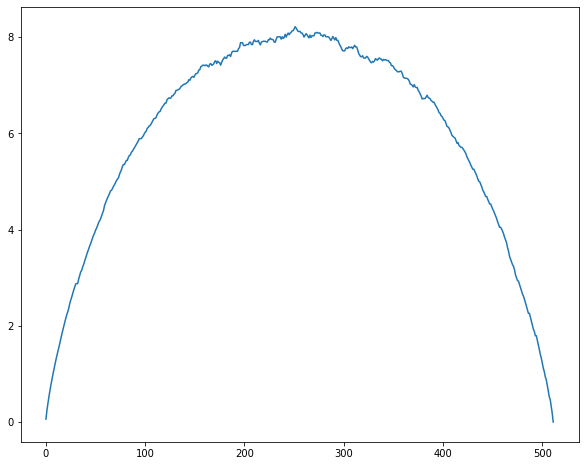

0it [01:22, ?it/s]
0it [01:42, ?it/s]


In [8]:
entropies = [pr.ca_entropy(a) for a in tqdm(pr.sample_CAs(rng=np.random.default_rng(0)))]
plt.plot(entropies)

## Training

In [44]:
ca = list(pr.sample_CAs(rng=rng))[24]

layer_dims = [100] + [100] * 11  # neighborhood conv + mlpconv layers
rng = np.random.default_rng(0)

model, optimizer, losses = pr.train(
    ca,
    layer_dims,
    rng,
    train_noise=0.05
)

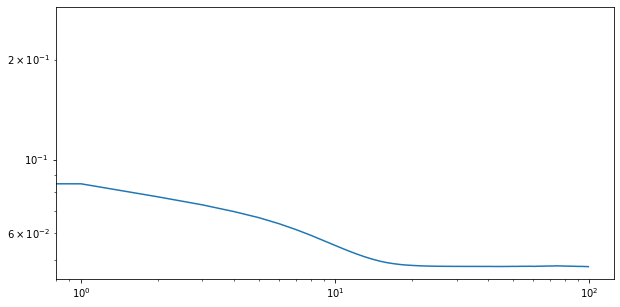

In [38]:
plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.loglog();

max loss: 0.9855516


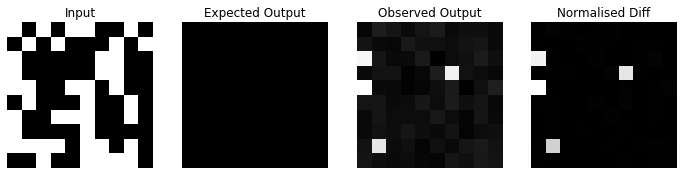

In [39]:
x = np.random.default_rng().choice([0, 1], size=100)
# x = make_glider(10)
X_test = torch.from_numpy(x.reshape(1, 10, 10)).float()
Y_test = ca(X_test).float()

if torch.cuda.is_available():
    X_test = X_test.cuda()
Y_pred = model(X_test)


if torch.cuda.is_available():
    X_test = X_test.cpu()
    Y_pred = Y_pred.cpu()

X_test = X_test.detach().numpy()
Y_test = Y_test.detach().numpy()
Y_pred = Y_pred.detach().numpy()

plt.figure(figsize=(12, 4))

plt.subplot(141)
plt.imshow(X_test[0])
plt.axis('off')
plt.title("Input")

plt.subplot(142)
plt.imshow(Y_test[0])
plt.axis('off')
plt.title("Expected Output")

plt.subplot(143)
plt.imshow(Y_pred[0], vmin=0, vmax=1)
plt.axis('off')
plt.title("Observed Output")

plt.subplot(144)
plt.imshow((Y_pred[0] - Y_test[0]) ** 2)
plt.axis('off')
plt.title("Normalised Diff")

print('max loss:', ((Y_pred[0] - Y_test[0]) ** 2).max())

## Find model entropies

In [40]:
pr.ca_entropy(ca)

1.0915216832582784

In [41]:
pr.calculate_entropies(model, layer_dims)

(8.79856952502345,
 [8.79856952502345,
  8.79856952502345,
  8.79856952502345,
  8.79856952502345,
  8.79856952502345,
  8.78706811042932,
  8.775827265296634,
  8.790125915645746,
  8.735721146055823,
  8.783238696890336,
  8.756462542237626,
  8.726592849017488],
 [array([0.73788343, 0.94320076, 0.84942086, 0.90707942, 0.97058382,
         0.95804202, 0.96795054, 0.61606136, 0.83511649, 0.86628685,
         0.51297285, 0.821994  , 0.68280396, 0.37518466, 0.99447011,
         1.        , 0.65195376, 0.9744894 , 0.55054184, 0.70796314,
         0.99330704, 0.35652411, 0.67180434, 0.99999549, 0.58423881,
         0.50179827, 0.84854818, 0.99929544, 0.93238236, 0.24515049,
         0.41525664, 0.99508474, 0.91235172, 0.97550543, 0.74028638,
         0.68416171, 0.16866093, 0.93899158, 0.26200376, 0.78556029,
         0.27297086, 0.20982925, 0.25922919, 0.21286259, 0.99295426,
         0.97550543, 0.62980503, 0.85967398, 0.79504028, 0.48464774,
         0.94268319, 0.52756165, 0.28106313,

## Compression

### Level Pruner

max loss: 0.009498488


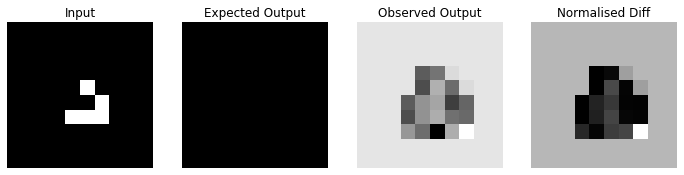

In [46]:
config_list = [{ 'sparsity': 0.1, 'op_types': ['default'] }]
m = pr.prune_model_and_test(model, optimizer, LevelPruner, config_list)
pr.display_test(m, ca)

### FPGM Pruner

max loss: 0.8260313


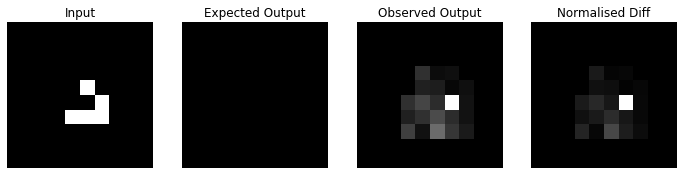

In [49]:
config_list = [{ 'sparsity': 0.1, 'op_types': ['Conv2d'] }]
m = pr.prune_model_and_test(model, optimizer, FPGMPruner, config_list)
pr.display_test(m, ca)

### L1 Pruner

max loss: 0.057577126


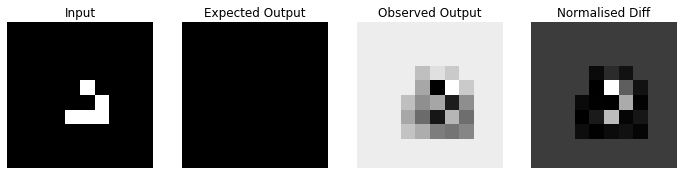

In [50]:
config_list = [{ 'sparsity': 0.1, 'op_types': ['Conv2d'] }]
m = pr.prune_model_and_test(model, optimizer, L1FilterPruner, config_list)
pr.display_test(m, ca)

### L2 Pruner

max loss: 0.315722


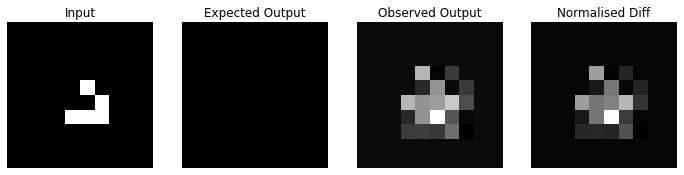

In [51]:
config_list = [{ 'sparsity': 0.1, 'op_types': ['Conv2d'] }]
m = pr.prune_model_and_test(model, optimizer, L2FilterPruner, config_list)
pr.display_test(m, ca)

### LotteryTicket Pruner

max loss: 0.011034868


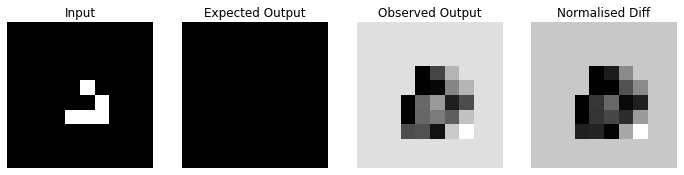

In [52]:
config_list = [{
    'prune_iterations': 50,
    'sparsity': 0.1,
    'op_types': ['default']
}]
m = pr.prune_model_and_test(model, optimizer, LotteryTicketPruner, config_list)
pr.display_test(m, ca)

## LMC Complexity

512it [00:11, 43.90it/s]


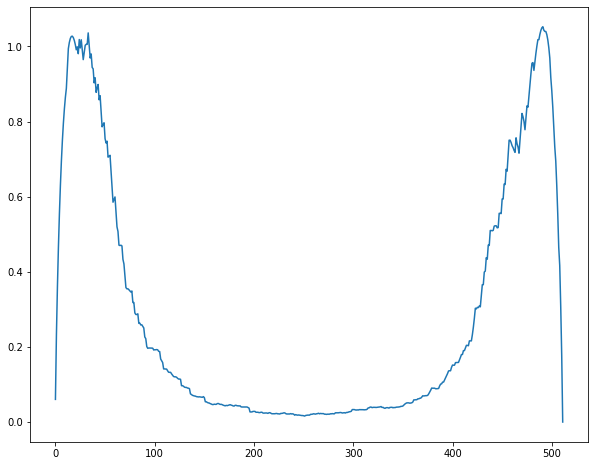

In [54]:
lmcs = [pr.ca_lmc(a) for a in tqdm(pr.sample_CAs(np.random.default_rng(0)))]
plt.plot(lmcs)

In [55]:
pr.ca_lmc(ca)

0.84617428570985

In [58]:
pr.model_lmc(model, layer_dims)

(0.023233722652015048,
 [0.023233722652015048,
  0.023233722652015048,
  0.023233722652015048,
  0.023233722652015048,
  0.023233722652015048,
  0.02345048801970825,
  0.023598748005586735,
  0.02332130281994762,
  0.02454191659470058,
  0.023412820651398308,
  0.023970816209375505,
  0.024938966126332795],
 [array([1.25722077e-01, 3.66440865e-02, 8.55267264e-02, 5.71573422e-02,
         1.96550806e-02, 2.75916102e-02, 2.13433093e-02, 1.48786518e-01,
         9.17486383e-02, 7.77769933e-02, 1.52564939e-01, 9.71757449e-02,
         1.38747898e-01, 1.37134682e-01, 3.80695591e-03, 0.00000000e+00,
         1.44155126e-01, 1.71296965e-02, 1.52782243e-01, 1.33340985e-01,
         4.60102923e-03, 1.33380126e-01, 1.40829085e-01, 3.12498591e-06,
         1.51434700e-01, 1.52158173e-01, 8.59155031e-02, 4.87937229e-04,
         4.30126924e-02, 1.03465955e-01, 1.43898106e-01, 3.38639777e-03,
         5.42963316e-02, 1.64685132e-02, 1.25053454e-01, 1.38479141e-01,
         7.61082453e-02, 3.9144945

In [61]:
cas = np.array([ca for ca in pr.sample_CAs(rng=np.random.default_rng(0))])
ca_entropies = np.array([pr.ca_entropy(ca) for ca in cas])
ca_lmcs = np.array([pr.ca_lmc(ca) for ca in cas])

In [62]:
i_test = np.r_[0:8:2, 8:128:16, 128:256:32]
i_test = np.sort(np.r_[i_test, 511 - i_test, 255])

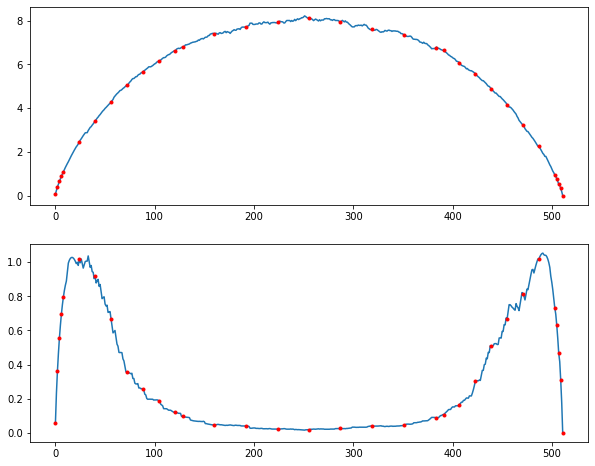

In [63]:
plt.subplot(211)
plt.plot(ca_entropies)
plt.plot(i_test, ca_entropies[i_test], 'r.')
plt.subplot(212)
plt.plot(ca_lmcs)
plt.plot(i_test, ca_lmcs[i_test], 'r.')
plt.show()